# 今日任务：图像聚类 I 


In [13]:
random_state = 42

def kmeans_clustering_image(image, k):
    """
    对图像进行 k-means 聚类
    
    Returns:
        k-means 聚类后的图像
    """
    rows, cols, channels = image.shape
    image_2d = image.reshape(rows * cols, channels)
    
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(image_2d)
    clustered = kmeans.cluster_centers_[kmeans.labels_]
    clustered = clustered.reshape(rows, cols, channels) 
    return clustered

---
4. 给定的图像，对其像素进行聚类并可视化

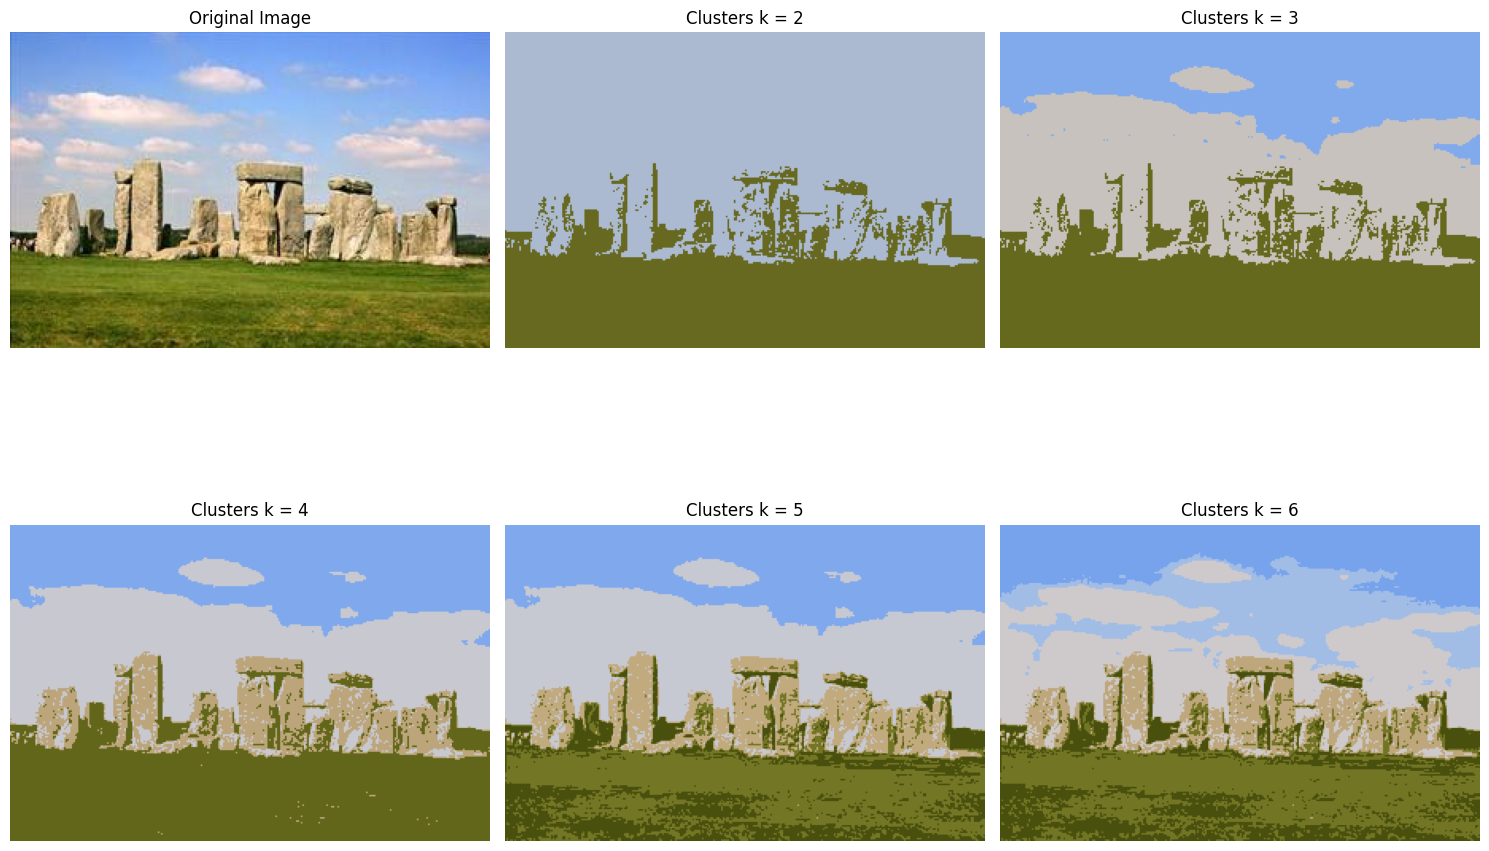

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# 加载图像
image = io.imread('datas/stones.jpg')
image = np.array(image, dtype=np.float64) / 255  # 归一化

# 聚类数目列表
k_values = [2, 3, 4, 5, 6]

# 绘制图像
plt.figure(figsize=(15, 10))
# 绘制原始图像
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.tight_layout()  # 调整子图间距
# 对不同的 k 值进行聚类
for i, k in enumerate(k_values):
    clustered_image = kmeans_clustering_image(image, k)
    # 绘制聚类图像
    plt.subplot(2, 3, i + 2)
    plt.imshow(clustered_image)
    plt.title(f"Clusters k = {k}")
    plt.axis('off')
plt.show()


---
5. 给定的图像数据集，可视化并输出聚类性能。

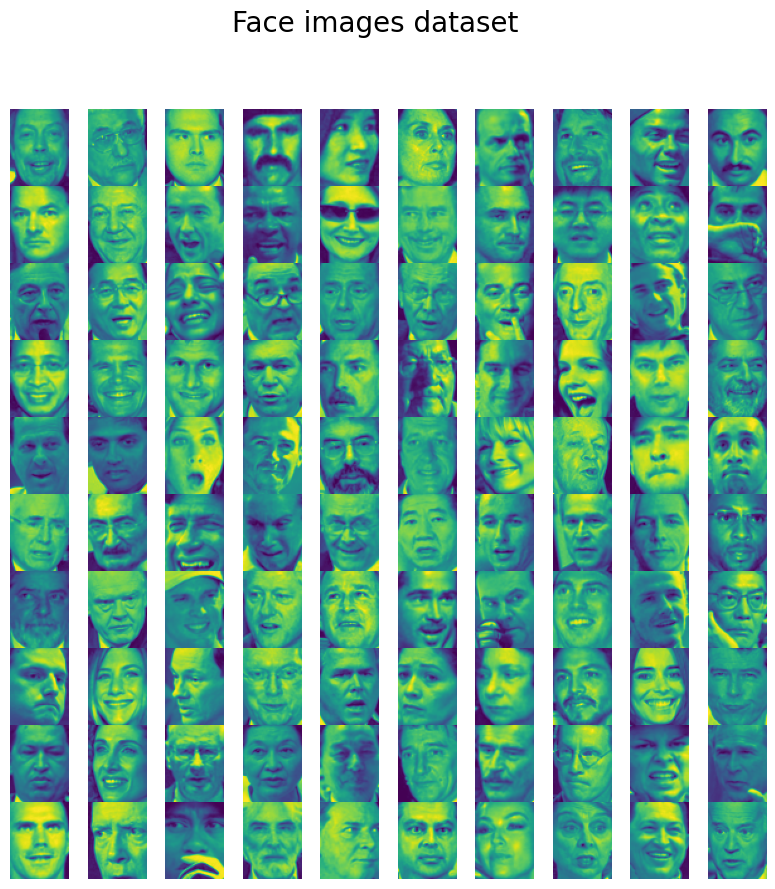

In [25]:
# 加载 sklearn 中的脸部数据集
import math
from sklearn.datasets import fetch_lfw_people

# 超参数
k = 6   # k_means 聚类数目

# 加载数据集
data = fetch_lfw_people(data_home="datas/ml/lfw_people")

# 设置图像展示数量
n_display = 100
n_rows = n_cols = int(math.sqrt(n_display))
assert n_rows * n_cols == n_display, f"n_display should be a square number, instead of n_rows = {n_rows} n_cols = {n_cols} n_display = {n_display}"

# 显示图像
n_samples, h, w = data.images.shape
plt.figure(figsize=(n_rows, n_cols))
for i in range(min(n_display, n_samples)):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(data.images[i])
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Face images dataset', size=20)
plt.show()

